#  Natural Langugage Processing Workshop: 2/18/2019
### <span style = "color:Purple"> Murong He and Facundo Santiago MSBA '18 </span>

### <span style = "color:Blue"> Questions/Comments/Concerns share here: goo.gl/slides/9ndtqj </span>

# Agenda

<ol>
    <li><span style = "color:Blue">Import Data/Libraries </span></li>
    <li><span style = "color:Blue"> Word Embedding Intuition  </span></li>
    <li><span style = "color:Blue">Implementation </span>

    <ul> <li><span style = "color:Green">Basic Exploration</span></li>
    <li><span style = "color:Green">Clean Data</span></li>
    <li><span style = "color:Green">Train model using word2vec</span></li>
    <li><span style = "color:Green">Use Pre-trained model </span></li>
    <li><span style = "color:Green">View & Compare Results</span></li>
    
    </ul>
    </li>

   <li><span style = "color:Blue">Compare results to tf-idf </span></li>
   <li><span style = "color:Blue">Questions</span></li>
   <li><span style = "color:Blue">Bonus: fastai (Santiago) </span></li>


</ol>

# <span style = "color:Blue"> 1. Import Data/Libraries</span>

In [47]:
import pandas as pd
pd.set_option('max_colwidth',99999)
import numpy as np
import re 

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('punkt')

import gensim
from gensim.models import Word2Vec, word2vec
from gensim.test.utils import common_texts, get_tmpfile

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.simplefilter("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\721814\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\721814\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


download link: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

In [70]:
# import dataset 
url = 'https://github.com/muronghe/Projects/raw/master/imdb_labelled.csv'
df = pd.read_csv(url, names = ['Review', 'Sentiment'])

# Load pretrained Word2Vec model from Google
pre_trained_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [71]:
df.head(2)

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0


# <span style = "color:Blue"> 2. Word Embedding Intuition </span>

## <span style= "color:Green"> 2a. Bag of Words </span>

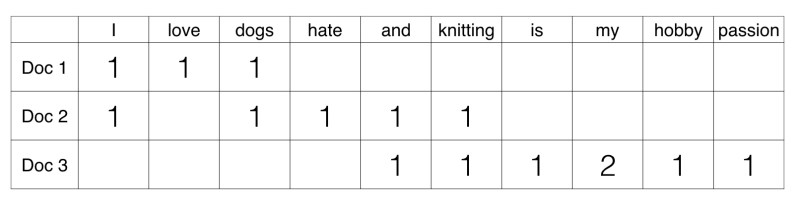

## <span style= "color:Green"> 2b. Word Embeddings </span>

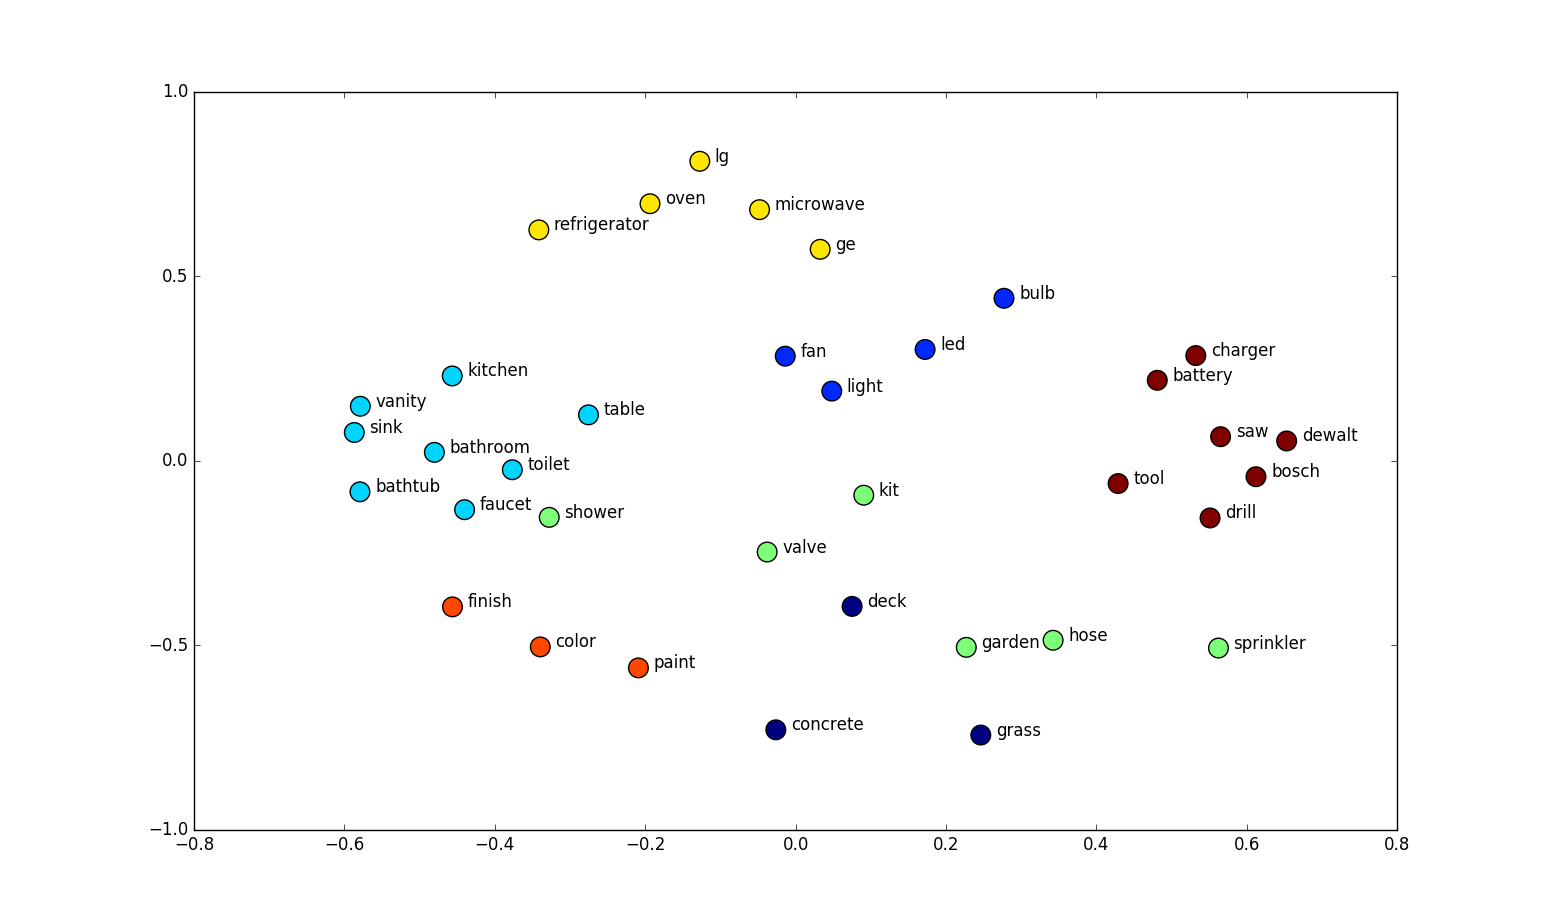

## "You shall know a word by the company that it keeps" 

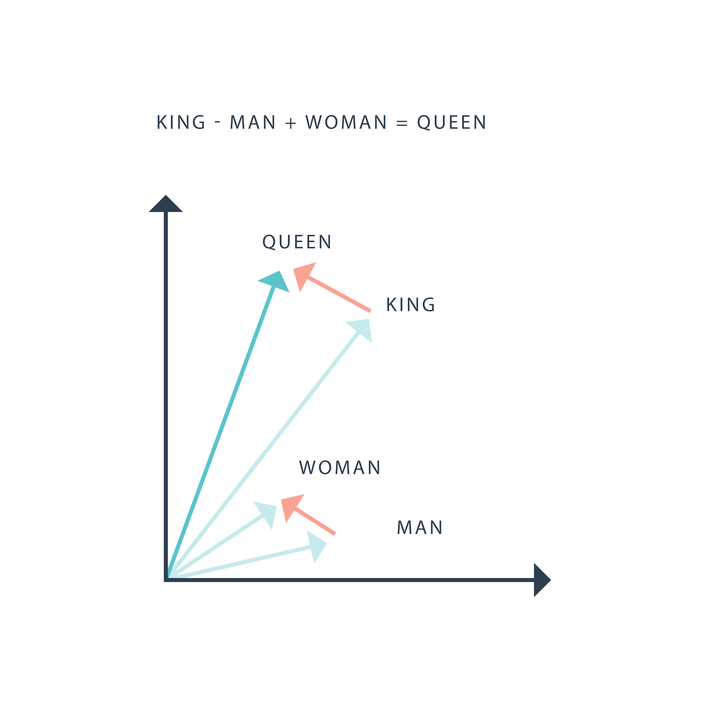

## Methodologies:
#### 1. Word2Vec (Neural Net) 
    a. Skip Gram Model: use context words to predict target word
    b. Continuous Bag of Words Model: use target word to predict context words
#### 2. Glove (Matrix Decomposition)

## Word2Vec (Word to Vector)

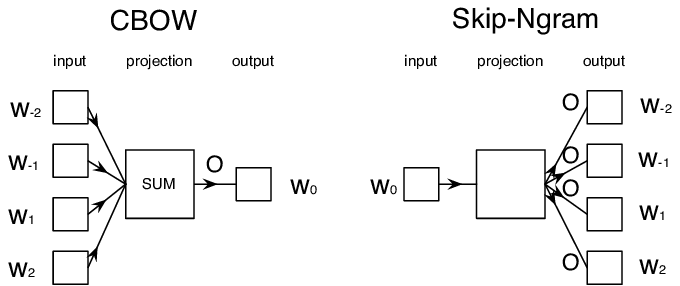

## Glove Word Representations

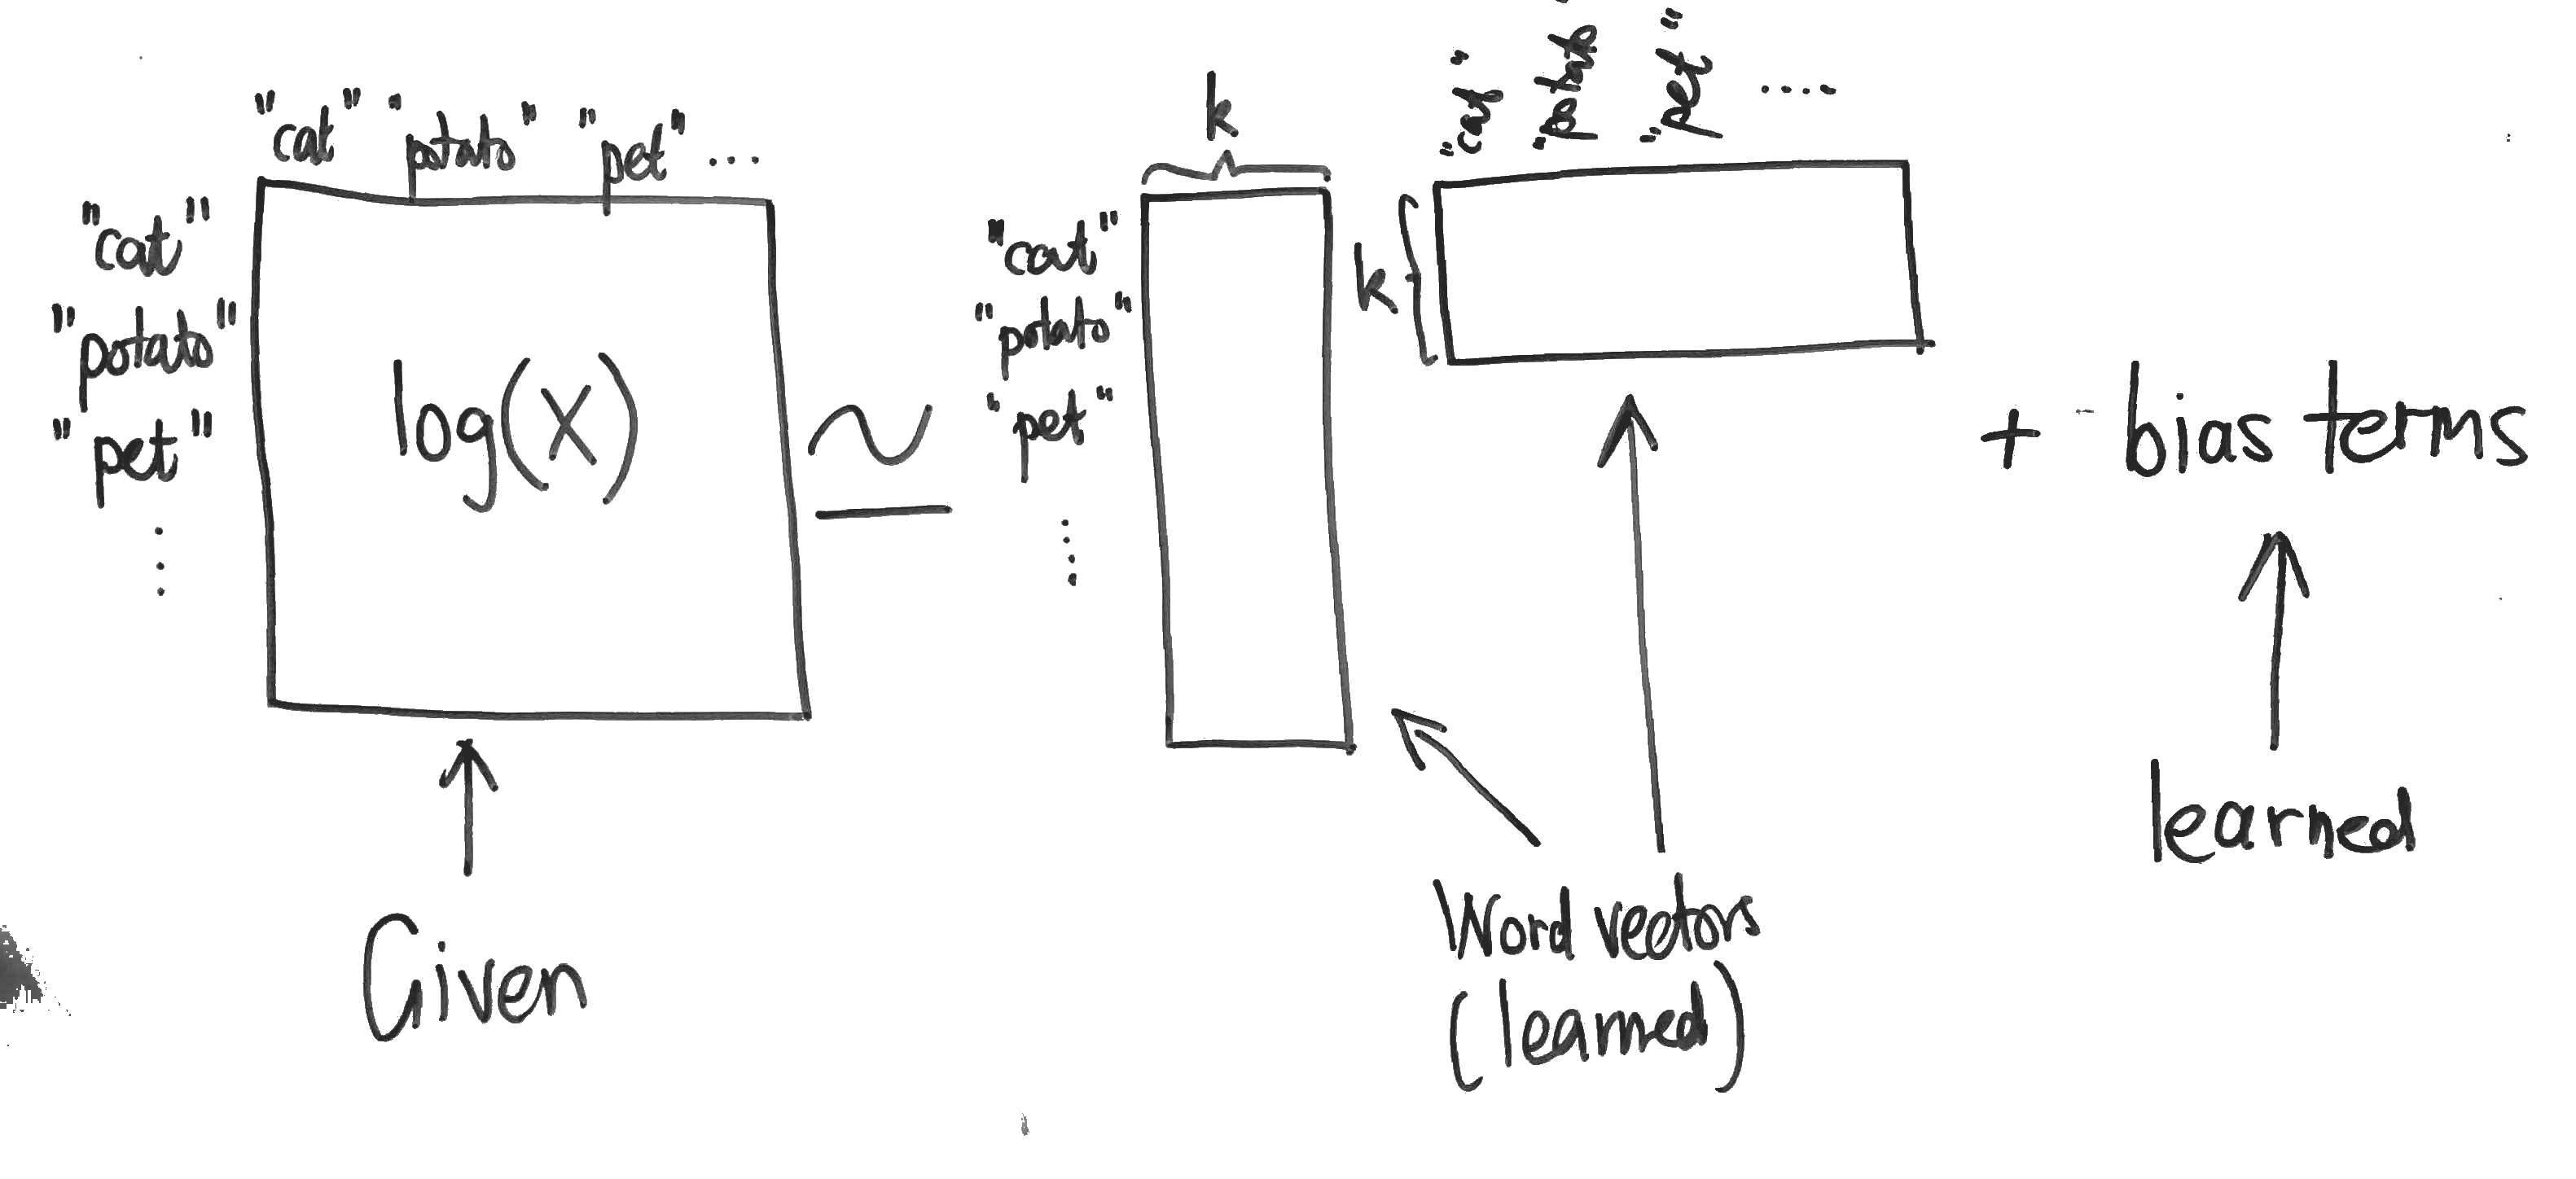

# <span style = "color:Blue"> 3. Implementation </span>

## <span style = "color:Green"> 3a. Basic Exploration </span>

In [185]:
# view data
df.head(2)

,Review,Sentiment,Review_tokenized,Review_no_stop
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,"[A, very, ,, very, ,, very, slow-moving, ,, aimless, movie, about, a, distressed, ,, drifting, young, man, .]","[A, ,, ,, slow-moving, ,, aimless, movie, distressed, ,, drifting, young, man, .]"
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,"[Not, sure, who, was, more, lost, -, the, flat, characters, or, the, audience, ,, nearly, half, of, whom, walked, out, .]","[Not, sure, lost, -, flat, characters, audience, ,, nearly, half, walked, .]"


In [5]:
# look at shape of dataset 
df.shape

(748, 2)

In [6]:
# check if dataset is balanced 
df['Sentiment'].value_counts()

1    386
0    362
Name: Sentiment, dtype: int64

In [7]:
# check for null values 
df.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [187]:
df[['Review']]

,Review
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man."
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out."
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent."
3,Very little music or anything to speak of.
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.
5,"The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty."
6,Wasted two hours.
7,"Saw the movie today and thought it was a good effort, good messages for kids."
8,A bit predictable.
9,Loved the casting of Jimmy Buffet as the science teacher.


## <span style = "color:Green"> 3b. Clean Data </span>

In [179]:
df['Review_tokenized'] = df.apply(lambda x: word_tokenize(str(x['Review'])),axis=1)

In [180]:
reviews = df['Review_tokenized'].values.tolist()

In [181]:
reviews_no_stop = []
for review in reviews:
    temp_lst = [w for w in review if not w in stop_words] 
    reviews_no_stop.append(temp_lst)

In [182]:
df['Review_no_stop'] = reviews_no_stop

In [184]:
df[['Review', 'Review_tokenized','Review_no_stop','Sentiment']].head()

,Review,Review_tokenized,Review_no_stop,Sentiment
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.","[A, very, ,, very, ,, very, slow-moving, ,, aimless, movie, about, a, distressed, ,, drifting, young, man, .]","[A, ,, ,, slow-moving, ,, aimless, movie, distressed, ,, drifting, young, man, .]",0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.","[Not, sure, who, was, more, lost, -, the, flat, characters, or, the, audience, ,, nearly, half, of, whom, walked, out, .]","[Not, sure, lost, -, flat, characters, audience, ,, nearly, half, walked, .]",0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.","[Attempting, artiness, with, black, &, white, and, clever, camera, angles, ,, the, movie, disappointed, -, became, even, more, ridiculous, -, as, the, acting, was, poor, and, the, plot, and, lines, almost, non-existent, .]","[Attempting, artiness, black, &, white, clever, camera, angles, ,, movie, disappointed, -, became, even, ridiculous, -, acting, poor, plot, lines, almost, non-existent, .]",0
3,Very little music or anything to speak of.,"[Very, little, music, or, anything, to, speak, of, .]","[Very, little, music, anything, speak, .]",0
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,"[The, best, scene, in, the, movie, was, when, Gerardo, is, trying, to, find, a, song, that, keeps, running, through, his, head, .]","[The, best, scene, movie, Gerardo, trying, find, song, keeps, running, head, .]",1


In [188]:
reviews_no_stop

[['A',
  ',',
  ',',
  'slow-moving',
  ',',
  'aimless',
  'movie',
  'distressed',
  ',',
  'drifting',
  'young',
  'man',
  '.'],
 ['Not',
  'sure',
  'lost',
  '-',
  'flat',
  'characters',
  'audience',
  ',',
  'nearly',
  'half',
  'walked',
  '.'],
 ['Attempting',
  'artiness',
  'black',
  '&',
  'white',
  'clever',
  'camera',
  'angles',
  ',',
  'movie',
  'disappointed',
  '-',
  'became',
  'even',
  'ridiculous',
  '-',
  'acting',
  'poor',
  'plot',
  'lines',
  'almost',
  'non-existent',
  '.'],
 ['Very', 'little', 'music', 'anything', 'speak', '.'],
 ['The',
  'best',
  'scene',
  'movie',
  'Gerardo',
  'trying',
  'find',
  'song',
  'keeps',
  'running',
  'head',
  '.'],
 ['The',
  'rest',
  'movie',
  'lacks',
  'art',
  ',',
  'charm',
  ',',
  'meaning',
  '...',
  'If',
  "'s",
  'emptiness',
  ',',
  'works',
  'I',
  'guess',
  "'s",
  'empty',
  '.'],
 ['Wasted', 'two', 'hours', '.'],
 ['Saw',
  'movie',
  'today',
  'thought',
  'good',
  'effort',
  

## <span style = "color:Green"> 3c. Train Model using Word2Vec </span>

In [161]:
from gensim.models import word2vec
w2v_model = word2vec.Word2Vec(reviews_no_stop, size = 300) 

In [163]:
def vectorize(model):
    review_counter = 0 
    all_review_vectors = np.zeros((len(reviews),300))
    all_words = set(model.wv.index2word)

    for review in reviews_no_stop:
        word_counter = 0
        one_review_vector = np.zeros(300)

        for word in review: 
            if word in all_words: 
                word_counter = word_counter + 1
                one_review_vector = np.add(one_review_vector,model[word])

        one_review_vector = np.divide(one_review_vector, word_counter)        

        all_review_vectors[review_counter] = one_review_vector
        review_counter = review_counter + 1 

    # set null values to be zero 
    all_review_vectors = np.nan_to_num(all_review_vectors)
    return all_review_vectors

In [164]:
all_review_vectors_w2v_model = vectorize(w2v_model)

In [165]:
def logistic_model_accuracy(vectors):
    # split dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(vectors,df['Sentiment'],
                                                       test_size = 0.2, random_state = 0)

    # initialize prediction regression model 
    logistic_regression_model = LogisticRegression()

    # fit model 
    logistic_regression_model.fit(X_train, y_train)

    # predict y values for model 
    y_train_pred = logistic_regression_model.predict(X_train)

    return ("Accuracy Score: ", round(accuracy_score(y_train, y_train_pred),2))
    

In [166]:
logistic_model_accuracy(all_review_vectors_w2v_model)

('Accuracy Score: ', 0.54)

## <span style = "color:Green"> 3c. Use Pre-Trained Word2Vec Model</span>

In [20]:
pre_trained_model 

In [21]:
print(pre_trained_model.most_similar(positive=['man', 'queen'], negative=['king'])[0]) 

('woman', 0.7609435319900513)


In [162]:
print(pre_trained_model.most_similar(positive=['Donald_Trump', 'Democrat'], negative=['Barack_Obama'])[0]) 

('Republican', 0.4995097517967224)


In [186]:
print(pre_trained_model.most_similar(positive=['India', 'Madrid'], negative=['Spain'])[0]) 

('Delhi', 0.7179063558578491)


In [181]:
print(pre_trained_model.most_similar(positive=['China', 'Washington_DC'], negative=['United_States'])[0]) 

('Beijing', 0.5704402327537537)


In [185]:
print(pre_trained_model.doesnt_match("daisy, sunflower, lily, laptop ".split())) 

laptop


In [177]:
print(pre_trained_model.doesnt_match("Donald_Trump, Ronald_Reagan, George_Bush, Barack_Obama ".split()))

Barack_Obama


In [ ]:
pre_trained_model.most_similar('movie')

In [171]:
all_review_vectors_pretrained_model = vectorize(pre_trained_model)

In [172]:
logistic_model_accuracy(all_review_vectors_pretrained_model)

('Accuracy Score: ', 0.91)

# <span style = "color:Blue"> 4. Compare results to TF-IDF </span>

In [153]:
X_train_tfidf, X_test_tfidf, y_train, y_test  = train_test_split(df['Review_cleaned'],df['Sentiment'])

In [154]:
vect = TfidfVectorizer()
vect.fit(X_train_tfidf)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [155]:
vect.transform(X_train_tfidf)

<561x2649 sparse matrix of type '<class 'numpy.float64'>'
	with 8861 stored elements in Compressed Sparse Row format>

In [156]:
sdg_classifier = SGDClassifier()
sdg_classifier.fit(vect.transform(X_train_tfidf), y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [157]:
y_pred_tfidf = sdg_classifier.predict(vect.transform(X_test_tfidf))

In [158]:
print("TFIDF Accuracy Score: ", round(accuracy_score(y_pred_tfidf,y_test),2))

TFIDF Accuracy Score:  0.78


# <span style = "color:Blue"> 5. Questions?</span>

# <span style = "color:Blue"> 6. Survey</span>

Please take 2 question Survey: https://goo.gl/forms/g4HXl481W4reb4ry1